## League Analysis Example

A example of analysis in game data from riots api

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

from lolAnalysis import LeagueAnalysis
from pprint import pprint

In [2]:
# Initalise the class with your working api key:
apiKey = "RGAPI-b0201a7b-93b7-48e4-a2d0-e162150cd6c7"
lolA = LeagueAnalysis(apiKey, summonerName="Froggen" )

In [3]:
# Creating a champion mastery list:
df =  lolA.create_mastery_table()
df.head(10)

,name,championLevel,championPoints,lastTimePlayed-dt
0,Anivia,7,352515,2021-12-02 13:04:16
1,LeBlanc,7,77950,2021-11-27 13:03:38
2,Lux,7,75682,2021-11-26 10:20:30
3,Twisted Fate,7,70715,2021-11-26 12:01:36
4,Veigar,7,66019,2021-11-27 17:26:56
5,Karthus,7,60517,2021-10-10 12:16:52
6,Ezreal,7,60039,2021-12-01 15:28:11
7,Gangplank,7,55371,2021-09-16 12:02:47
8,Viktor,6,51193,2021-12-01 12:27:47
9,Kassadin,7,45264,2021-10-13 10:50:45


In [4]:
# Creating a champion mastery list with a different summoner name :
df =  lolA.create_mastery_table(summoner_name='Moving Object 2')
df.head(10)

,name,championLevel,championPoints,lastTimePlayed-dt
0,Twitch,7,676706,2021-12-16 14:25:44
1,Brand,7,471811,2021-12-16 12:56:00
2,Xerath,7,132481,2021-11-20 14:05:38
3,Evelynn,5,70908,2021-08-22 00:20:12
4,Master Yi,7,69670,2021-12-04 09:42:03
5,Veigar,7,58826,2021-08-04 13:12:12
6,Nami,7,53324,2021-12-13 11:49:25
7,Kha'Zix,5,52954,2021-06-14 02:40:13
8,Lulu,5,49639,2021-12-10 12:46:25
9,Tristana,5,33342,2021-08-08 19:59:53


In [5]:
# create a event timeline dataframe for analysis
result = lolA.create_event_timeline_dataframe('EUW1_5612017679')
result.head()

,realTimestamp,timestamp,type,itemId,participantId,levelUpType,skillSlot,creatorId,wardType,level,...,summonerName_victim,summonerId_victim,championName_victim,individualPosition_victim,participantId_killer,puuid_killer,summonerName_killer,summonerId_killer,championName_killer,individualPosition_killer
0,1.639663e+12,0,PAUSE_END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,25104,WARD_PLACED,NaN,NaN,NaN,NaN,5.0,UNDEFINED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,25104,WARD_PLACED,NaN,NaN,NaN,NaN,0.0,UNDEFINED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,25104,WARD_PLACED,NaN,NaN,NaN,NaN,5.0,UNDEFINED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,25104,WARD_PLACED,NaN,NaN,NaN,NaN,0.0,UNDEFINED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# from the event timeline dataframe obtain only the kills and special kills (multi-kills?)
kill_df = result[ (result['type'] == 'CHAMPION_KILL') | (result['type'] == 'CHAMPION_SPECIAL_KILL')].copy()
kill_df['time'] = kill_df['timestamp']/1000/60
kill_df[['time','summonerName_victim','championName_victim','summonerName_killer','championName_killer']].sort_values('time').head()

,time,summonerName_victim,championName_victim,summonerName_killer,championName_killer
1465,2.391600,NaN,NaN,Jedebutetop,Jax
1473,2.391600,Naak Nako,Irelia,Jedebutetop,Jax
1498,3.542833,Naak Nako,Irelia,CpT Amiral,Viego
1580,3.581917,Jedebutetop,Jax,Foutriquet,XinZhao
1479,3.701900,NaN,NaN,CpT Amiral,Viego


In [7]:
# Create the chamption timeline dataframe -- this is mainly stats and kpi's
tsData = lolA.create_champion_timeline_dataframe('EUW1_5612017679')

List of roles avaliable:  ['TOP' 'JUNGLE' 'MIDDLE' 'BOTTOM' 'UTILITY']


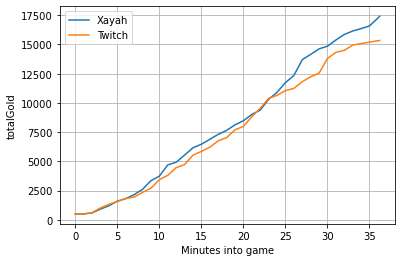

In [8]:
# Use the chamption timeline dataframe to plot the data

# Expant the damage stats and champion stats if required
champion_df_dict = lolA.parse_champion_timeline_dataframe(tsData)

# Option 1: Plot everyones total gold:
champs_to_plot = tsData['championName'].unique()

# Option 2: Explicitly select the champs:
champs_to_plot = ['Twitch','Xayah']

# Option 3: Select a roll
print('List of roles avaliable: ',tsData['individualPosition'].unique())
champs_to_plot = tsData[ tsData['individualPosition'] == 'BOTTOM' ]['championName'].unique()

# Option 4: Your own way of deciding how to plot data

# Plotting the data
plotting_key = 'totalGold'
for champ in champs_to_plot:
    plt.plot(champion_df_dict[champ]['time'],champion_df_dict[champ][plotting_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(plotting_key)
    
plt.legend(champs_to_plot)

In [9]:
%%time
# expand the DataFrame for additional KPI's/Stats
tsData_expanded = lolA.expand_champion_stats(tsData)

Wall time: 6.17 s


List of roles avaliable:  ['TOP' 'JUNGLE' 'MIDDLE' 'BOTTOM' 'UTILITY']


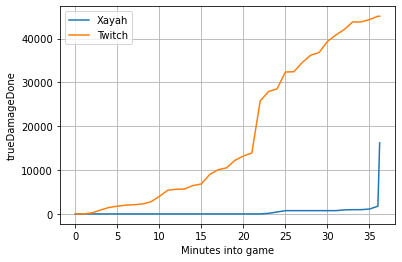

In [10]:
# parse out the information for each champ for easier plotting.
champion_df_dict = lolA.parse_champion_timeline_dataframe(tsData_expanded)

# Or select a roll
print('List of roles avaliable: ',tsData_expanded['individualPosition'].unique())
selected_role = 'BOTTOM'

champs_to_plot = tsData_expanded[ tsData['individualPosition'] == selected_role ]\
                ['championName'].unique()

df_key = 'trueDamageDone'
for champ in champs_to_plot:
    plt.plot(champion_df_dict[champ]['time'],champion_df_dict[champ][df_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(df_key)
    
plt.legend(champs_to_plot)


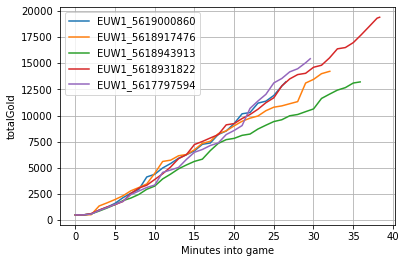

In [20]:
# Comparing stats from game-to-game opposing to champ-to-champ in a single game.

# Get the last 20 match id's for a summoner:
summoner_name = 'Moving Object 1'
list_of_games = lolA.get_list_of_matches(summoner_name=summoner_name) 

# filter list if necessary, for example the last five games in the list_of_games
games_to_compare = list_of_games[-5:]

# set up data for plotting
game_data = {}
multi_df_dict = {}
for game in games_to_compare:
    game_data[game] = lolA.create_champion_timeline_dataframe(game)
    multi_df_dict[game] = lolA.parse_champion_timeline_dataframe(game_data[game], aggregate_on='summonerName')
        
df_key = 'totalGold'
for game in multi_df_dict:
    plt.plot(multi_df_dict[game][summoner_name]['time'],multi_df_dict[game][summoner_name][df_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(df_key)
    plt.legend(games_to_compare)

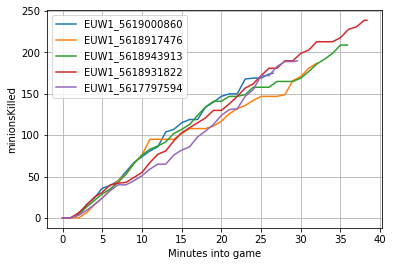

In [22]:
df_key = 'minionsKilled'
for game in game_data:
    plt.plot(multi_df_dict[game][summoner_name]['time'],multi_df_dict[game][summoner_name][df_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(df_key)
    plt.legend(games_to_compare)